# Assignment of Lecture 04

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

## Part I Review the online programming. 

### Dynamic Programming For Cutting Problems

In [1]:
from collections import defaultdict

original_price = [1,5,8,9,10,17,17,20,24,30]
price = defaultdict(int)
for i,p in enumerate(original_price):
    price[i+1] = p
assert price[1] == 1

In [2]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30})

### decorator

In [3]:
import time

In [4]:
def func_1(n):
    for i in range(n):
        print(n)

In [5]:
def call_time(func_1,arg):
    start = time.time()
    func_1(arg)
    print('used time: {}'.format(time.time() - start))

In [6]:
call_time(func_1,10)

10
10
10
10
10
10
10
10
10
10
used time: 0.0002880096435546875


In [7]:
from functools import wraps

In [8]:
function_called_time = defaultdict(int)

def get_call_time(func):
    @wraps(func)
    def _inner(arg): # *args,**kwargs
        """It is inner function"""
        global function_called_time
        function_called_time[func.__name__] += 1
        result = func(arg)
        print('function called time is :{}'.format(function_called_time[func.__name__]))
        return result
    return _inner

In [9]:
func_1 = get_call_time(func_1) ## => @decorator

In [10]:
func_1(10)

10
10
10
10
10
10
10
10
10
10
function called time is :1


In [11]:
function_called = defaultdict(int)

def printNotes(string):
    @wraps(string)
    def print_style(func):
        @wraps(func)
        def _inner(*args,**kwargs):
            print("++++  {}  ++++".format(string))
            global function_called
            function_called[func.__name__] += 1
            start = time.time()
            result = func(*args,**kwargs)
            print("The function used time: {}".format(time.time() - start))
            print('function called times is :{}'.format(function_called[func.__name__]))

            return result
        return _inner
    return print_style

In [12]:
@printNotes("Who will be execute first...")
@printNotes("this is func_2 test...")
def func_2(n):
    """
    @param n: is the number of customers
    @return int: the customers value point
    """
    for i in range(n):
        print(n)
    return 0

In [13]:
func_2(5)

++++  Who will be execute first...  ++++
++++  this is func_2 test...  ++++
5
5
5
5
5
The function used time: 0.000141143798828125
function called times is :2
The function used time: 0.00020933151245117188
function called times is :2


0

In [14]:
help(func_2)

Help on function func_2 in module __main__:

func_2(n)
    @param n: is the number of customers
    @return int: the customers value point



In [15]:
@printNotes("This is decorator test")
def func_slow(n):
    for i in range(n):
        time.sleep(0.2)
        print(n)

In [16]:
func_slow(3)

++++  This is decorator test  ++++
3
3
3
The function used time: 0.602492094039917
function called times is :1


### Dynamic Programming For Cutting Problems

In [17]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30})

In [18]:
solution = {}
## for a given length N, we set the corrsponding split parts
## solution = 
# {
#     4: (2, 2)
# }

In [19]:
def memo(func):
    cache = {}
    @wraps(func)
    def _wrap(n):
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] =result
        return result
    return _wrap

In [20]:
@memo
def r(n):
    max_price, split_point = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (split_point, n - split_point)
    
    return max_price

In [21]:
r(4)

10

In [22]:
solution[4]

(2, 2)

In [23]:
solution

{1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (2, 2)}

### Dynamic Programming
+ 分析子问题的重复性
+ 子问题进行存储
+ Solution要进行解析

In [24]:
from functools import lru_cache

In [25]:
@lru_cache(maxsize=2**10)
def rr(n):
    max_price, split_point = max(
        [(price[n], 0)] + [(rr(i) + rr(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (split_point, n - split_point)
    
    return max_price

In [26]:
rr(180)

540

In [27]:
rr.cache_info()

CacheInfo(hits=32041, misses=180, maxsize=1024, currsize=180)

In [28]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [29]:
def not_cut(split): return split == 0

def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]
    
    if not_cut(left): return [right]
    return parse_solution(left,revenue_solution) + parse_solution(right,revenue_solution)

In [30]:
parse_solution(105, solution)

[2, 3, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [31]:
parse_solution(19, solution)

[3, 6, 10]

## Part1-2: Finish the Solution Parse Part of Edit-Distance

### Edit Distane

In [32]:
dis_solution = {}
## solution = 
# {
#     (string1, string2): operation
# }

In [33]:
def edit_distance(string1, string2):
    
    if len(string1) == 0:return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1])+0, "No operation")
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1])+1, 'SUB {}=>{}'.format(tail_s1, tail_s2))
    
    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    dis_solution[(string1, string2)] = operation 
    
    return min_distance

In [34]:
edit_distance('ABCDEF', 'ABCCE')

2

In [35]:
dis_solution

{('A', 'A'): 'No operation',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): 'No operation',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): 'No operation',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D=>C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): 'No operation',
 ('ABCDEF', 'A'): 'DEL F',
 ('ABCDEF', 'AB'): 'DEL F',
 ('ABCDEF', 'ABC'): 'DEL F',
 ('ABCDEF', 'ABCC'): 'DEL F',
 ('ABCDEF', 'ABCCE'): 'DEL F'}

In [36]:
edit_distance('1010', '11100')

2

In [37]:
dis_solution

{('A', 'A'): 'No operation',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): 'No operation',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): 'No operation',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D=>C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): 'No operation',
 ('ABCDEF', 'A'): 'DEL F',
 ('ABCDEF', 'AB'): 'DEL F',
 ('ABCDEF', 'ABC'): 'DEL F',
 ('ABCDEF', 'ABCC'): 'DEL F',
 ('ABCDEF', 'ABCCE'): 'DEL F',
 ('1', '1'): 'No operation',
 ('1', '11'): 'ADD 1',
 ('1', '111'): 'ADD 1',
 ('1', '1110'): 'ADD 0',
 ('1', '11100'): 'ADD 0',
 ('10', '1'): 'DEL 0',
 ('10', '11'): 'SUB 0=>1

### Parse-Dis_Solution

    采用分治的思想，将复杂问题分解成相似的子问题，然后求解各个子问题。
    假设将字符串A[m],转换成字符串B[n]：
    从A字符串的最后一位开始，观察经过何种操作能够使得A字符串的最后一位跟B字符串想相同。依次进行下去，直到A字符串长度为0，也就是观察到了A字符串的第一位字符。
    
> 该问题具有如下的递归规律:
>> 1.$A[m] == B[n]$时，从A的最后一位转变为B的最后一位，无需任何操作。即子问题$dis_solution(A[m],A[n])$,返回的操作为`No operation`。

>> 2.$A[m] != B[n]$时，从A的最后一位变成B的最后一位有以下几种情况：
+ (1) 删除最后一位$A[m]$，转换成B，即子问题$dis_solution(A[m],A[n])$，返回的操作为`DEL A[m]`.
+ (2) 增加最后一位$B[n]$,转换成B，即子问题$dis_solution(A[m],A[n])$，返回的操作为`ADD B[n]`.
+ (3) 替换最后一位$A[m] => B[n]$,即子问题$dis_solution(A[m],A[n])$，返回的操作为`SUB A[m] => B[n]`.

>>递归边界：
>>>当观察的字符串的长度$length==0$时，递归跳出，返回$[(0,over)]$





In [50]:
def parse_dis_solution(string, dis_solution):
    st1,st2 = string
    
    length = max(len(string[0]), len(string[1]))

    if length == 0: return [(length, "over")]
    
    op, value = dis_solution[(string[0],string[1])].split(' ')
    
    if op == 'ADD': #A须在最后一位增加B的最后一位，方可转换成B
        t = dis_solution[(string[0],string[1][:-1])]
        return [(length, '{} {}'.format(op,value))] + parse_dis_solution((string[0],string[1][:-1]),dis_solution)
    if op == 'DEL': #A须删除最后一位，方可转换成B
        t= dis_solution[(string[0][:-1],string[1])]
        return [(length, '{} {}'.format(op,value))] + parse_dis_solution((string[0][:-1],string[1]),dis_solution)
    if op == 'SUB': #A须将最后一位替换成B的最后一位，方可转换成B
        t = dis_solution[(string[0][:-1],string[1][:-1])]
        return [(length, '{} {}'.format(op,value))] + parse_dis_solution((string[0][:-1],string[1][:-1]),dis_solution)
    if op == 'No' and value == 'operation': #A，B最后一位相同，不操作，往前观察
        return parse_dis_solution((string[0][:-1],string[1][:-1]),dis_solution)

    
    pass

In [49]:
parse_dis_solution(('1010', '11100'),dis_solution)

[(5, 'ADD 0'), (2, 'SUB 0=>1'), (0, 'over')]

In [39]:
parse_dis_solution(('ABCDEF', 'ABCCE'),dis_solution)

[(6, 'DEL F'), (4, 'SUB D=>C'), (0, 'over')]

In [58]:
def how_to_convert(strA, strB):
    res = parse_dis_solution((strA,strB),dis_solution)
    print("Start to convert {} into {}.".format(strA,strB))
    for i,it in enumerate(res):
        if it[1] != 'over':
            op, v = it[1].split()
            print("Step {} : You should {} the {}-th character {} (index starts from 1)" \
                  .format(i+1,op,it[0],v))
        else:
            print("Convert {} into {} over.".format(strA,strB))
        

In [56]:
how_to_convert('1010', '11100')

Start to convert 1010 into 11100.
Step 1 : You should ADD the 5-th character 0 (index starts from 1)
Step 2 : You should SUB the 2-th character 0=>1 (index starts from 1)
Convert 1010 into 11100 over.


In [57]:
how_to_convert('ABCDEF', 'ABCCE')

Start to convert ABCDEF into ABCCE.
Step 1 : You should DEL the 6-th character F (index starts from 1)
Step 2 : You should SUB the 4-th character D=>C (index starts from 1)
Convert ABCDEF into ABCCE over.


### Part 2 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑快与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans: 
+ 很多问题是很复杂的，直接求解会相当困难，计算量大，耗费很多资源和时间。但是这些复杂的问题中蕴含中某种相似的规律，我们可以采取某种分解方法，将这个复杂的问题分解中若干相似的子问题，这些子问题通常是很容易求解，进而我们可以很快的求解这个复杂的问题，缩减了时间，减少了资源的占用。
+ 搜索问题中的广度搜索方法类似于动态规划。广度优先搜索方法中的每一个层可以看成动态规划中的每一个子问题或者每一个状态，广度搜索采用队列来记住每一层，动态规划往往采用表来记录中间状态。
+ 搜索问题：找下一步最优
+ 动态规划：是一种记忆化搜索，将找到的每一步的最优都存起来了

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans: 有很多问题，使用动态规划来解决可能会更加快捷，因为机器学习的方法需要大量的数据，然后还要做特征工程，各种调参来拟合数据，步骤很繁琐。但是采用动态规划的算法来解决可能会更简便、快捷

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans: 矩阵连乘、求最长公共子序列、背包问题

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: 最小编辑距离、模糊匹配、拼写检查、求最长公共子序列

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans:
+ 具有最优子结构：母问题的最优解包含了其子问题的最优解，
+ 子问题的重复性：子问题本质上和母问题是一样的，只是输入的参数不同，
+ 子问题的相互独立：子问题在求解最优解的时候是相互独立的，自身子问题求解跟其他平行子问题的求解互不干扰。

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Disadvantages：
+ 没有统一的标准模型；
+ 数值方法求解时存在维数灾，消耗空间大，当所给出范围很大时，堆栈中很可能并不能满足所需要的空间大小，

## Part 4 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [42]:
import random
import matplotlib.pylab as plt

In [100]:
latitudes = [random.randint(-100, 100) for _ in range(5)]
longitude = [random.randint(-100, 100) for _ in range(5)]

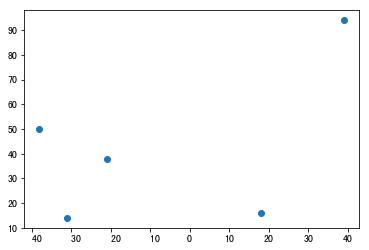

In [79]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

例如： 

In [45]:
chosen_p = (5, 10)

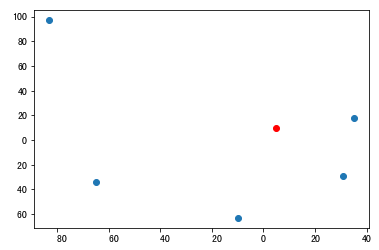

In [101]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

### 问题分析

#### 描述：
从初始点出发，经过k个点，必须经过且只能经过一次，回到出发点，所经过的路程最短。k+1个点构成的是无向完全图。

#### 分析：动态规划--分治思想--大化小
>分析子问题的重复性：

```python
distance = {} 
#当前到达定点current_point，经过点集合path_points_set所有顶点一次的最短路程
# {
#     current_point,path_points_set
# }
```
>情形1:  $path\_points\_set$仅包含起点：即$distance\{s,\{s\}\} = 0$

> 其他情形：对其他子问题求解，$i$为当前节点，$distance\{k,path\_points\_set\_1\}$从第k个节点起，经过$path\_points\_set\_1$集合中所有的点，到达终点的最短路径长度
$$distance\{i,path\_points\_set+\{i\}\}= min\{distance\{k,path\_points\_set\_1\} + C_{ki}\}$$



In [64]:
chosen_p = (5, 10)

In [102]:
all_point = {(i,j) for i,j in zip(latitudes,longitude)}

In [103]:
all_point

{(-83, 97), (-65, -34), (-10, -63), (31, -29), (35, 18)}

In [95]:
from collections import defaultdict

In [112]:
tsp_solution = {}

In [61]:
import math

In [62]:
def get_distance(x,y):
    return math.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

In [121]:
get_distance(chosen_p,(-65, -34))

82.68010643437755

In [120]:
sum = 0
a = list(all_point)
for i,v in enumerate(a[:-1]):
    sum+= get_distance(v,a[i+1])
print(sum)
sum += get_distance(chosen_p,a[0])
print(sum)

304.61408891257094
428.35979590881385


In [92]:
get_distance(chosen_p,(-18,80))+get_distance((-18, 80), (80, 77))

171.72765569390413

In [111]:
def TSP(p,point_set):
    if p in point_set and len(point_set) ==1: return 0
    if len(point_set) == 0: return 0

    min_dis, point = min(
        [(get_distance(p,k)+TSP(k,point_set-{k}),k) for k in point_set], key=lambda x: x[0]
    )
    
    tsp_solution[(point,tuple(list(point_set)))] = min_dis
    
    return min_dis


In [113]:
TSP(chosen_p,all_point)

325.88977595019605

In [114]:
tsp_solution

{((-65, -34), ((-65, -34),)): 132.23085872821065,
 ((-10, -63), ((-10, -63),)): 175.86642658563346,
 ((-10, -63), ((-10, -63), (-65, -34))): 154.83783749572225,
 ((35, 18), ((35, 18),)): 142.00352108310554,
 ((-65, -34), ((35, 18), (-65, -34))): 244.94288115705362,
 ((-10, -63), ((35, 18), (-10, -63))): 154.83783749572225,
 ((35, 18), ((35, 18), (-10, -63), (-65, -34))): 202.0077431560053,
 ((31, -29), ((31, -29),)): 169.91762710207556,
 ((31, -29), ((31, -29), (-65, -34))): 143.30002581000508,
 ((-10, -63), ((31, -29), (-10, -63))): 115.44066216918236,
 ((31, -29), ((31, -29), (-10, -63), (-65, -34))): 162.61056782946537,
 ((35, 18), ((35, 18), (-65, -34))): 159.881928089126,
 ((31, -29), ((31, -29), (35, 18))): 100.43340160262612,
 ((-65, -34), ((31, -29), (35, 18), (-65, -34))): 275.53088453821573,
 ((35, 18), ((35, 18), (-10, -63))): 234.66419235198856,
 ((31, -29), ((31, -29), (-10, -63))): 223.18112304441865,
 ((-10, -63), ((31, -29), (35, 18), (-10, -63))): 162.61056782946537,
 